### Dataset to use - change this value to analyze a different data set

In [1]:
dataset = 'twenty_small_world'

In [2]:
from analysis import check_folder
check_folder.check_folder(dataset)

[]

### Load in parent probabilities and rates

In [3]:
from analysis import check_gies
import numpy as np

In [4]:
dag_folders = check_gies.get_dag_folders(dataset)
true_dags = check_gies.get_true_dags(dag_folders)
print('loaded DAGs')
parent_probs_by_dag = check_gies.get_parent_probs_by_dag(dag_folders, 10)
print('Computed parent probabilities')

loaded DAGs
/Users/chandlersquires/Documents/active_learning/new/data/twenty_small_world/dags/dag0
Computed parent probabilities


### Load the rates DataArray, a 7-dimensional tensor mapping each strategy (strategy name, n, b, k) and significance level to the value of a rate for all DAGs

In [5]:
strategy_names = ['random', 'edge-prob', 'learn-parents']
ks = [2]
bs = [2, 3, 4]
ns = [24, 96, 384]
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [6]:
rates_da = check_gies.get_rates_data_array(
    parent_probs_by_dag,
    true_dags,
    target=10,
    strategy_names=strategy_names,
    ks=ks,
    bs=bs,
    ns=ns,
    alphas=np.linspace(0, 1, 11)
)
print(rates_da.dims)

('strategy', 'k', 'b', 'n', 'alpha', 'rate', 'dag')


### Plot curves for each strategy

In [10]:
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
%matplotlib inline
plt.rcParams["figure.figsize"] =(20,12)
sns.set(font_scale=1.5)

In [11]:
linestyles = ['solid', 'dashed', 'dotted']

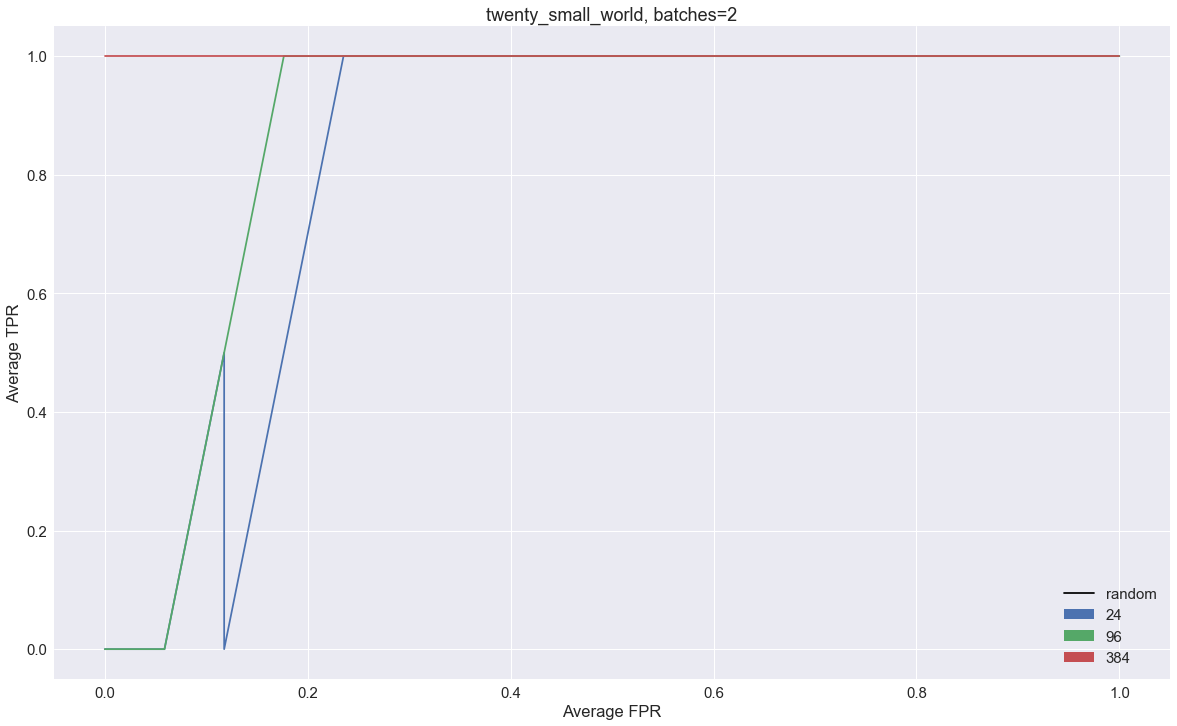

In [17]:
plt.clf()

rate_avgs_da = rates_da.mean(dim='dag')
b=2
strategy_names = ['random']
for strategy, linestyle in zip(strategy_names, linestyles):
    for n, color in zip(ns, sns.color_palette()):
        strat_avg_tprs = rate_avgs_da.sel(strategy=strategy, b=b, k=2, n=n, rate='tpr').values
        strat_avg_fprs = rate_avgs_da.sel(strategy=strategy, b=b, k=2, n=n, rate='fpr').values

        sort_ixs = np.argsort(strat_avg_fprs)
        plt.plot(strat_avg_fprs[sort_ixs], strat_avg_tprs[sort_ixs], linestyle=linestyle, color=color)

sample_handles = [
    mpatches.Patch(facecolor=color, label=n)
    for n, color in zip(ns, sns.color_palette())
]
strat_handles = [
    mlines.Line2D([0], [0], color='k', linestyle=linestyle, label=strat) 
    for strat, linestyle in zip(strategy_names, linestyles)
]
plt.legend(
    handles=strat_handles + sample_handles
)
plt.title(dataset + ', batches=%s' % b)
plt.xlabel('Average FPR')
plt.ylabel('Average TPR');

In [13]:
rate_avgs_da

<xarray.DataArray (strategy: 3, k: 1, b: 3, n: 3, alpha: 11, rate: 6)>
array([[[[[[1.      , ..., 1.      ],
           ...,
           [0.      , ..., 0.894737]],

          ...,

          [[1.      , ..., 1.      ],
           ...,
           [1.      , ..., 1.      ]]],


         ...,


         [[[1.      , ..., 1.      ],
           ...,
           [0.      , ..., 0.894737]],

          ...,

          [[1.      , ..., 1.      ],
           ...,
           [1.      , ..., 1.      ]]]]],




       ...,




       [[[[[1.      , ..., 1.      ],
           ...,
           [0.      , ..., 0.894737]],

          ...,

          [[1.      , ..., 1.      ],
           ...,
           [1.      , ..., 1.      ]]],


         ...,


         [[[1.      , ..., 1.      ],
           ...,
           [0.      , ..., 0.894737]],

          ...,

          [[1.      , ..., 1.      ],
           ...,
           [1.      , ..., 1.      ]]]]]])
Coordinates:
  * strategy  (strategy) <U13 'random' 